# The Pole-Barn Paradox
See http://hyperphysics.phy-astr.gsu.edu/hbase/Relativ/polebarn.html#c1 <br>
As usually stated (?), you close up a long pole in a shorter barn by boosting the pole to beta = lots.  Following the above example, the pole is 20 m long, and the barn is 10 m long with a front and back door.  So in the S-frame where the barn is at rest, the pole looks short and we can close it up in the barn.  *BUT,* in the Pole-frame (S'), the barn is short and there is now way to "trap the pole inside."

## Let t=t'=0 when the front of the pole almost touches the front of the barn
Pick beta=0.9 for the pole, moving from left to right in the S-frame.  So the Barn moves right-left in the S'-frame.  Use the LLF() class to handle the Lorentz transformations.

In [1]:
%matplotlib notebook
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import LLFTransforms as LLFT  # For the LLF() class especially, also has LorShape to handle sets of points.

In [2]:
beta = 0.9
lpole = 20.0
lbarn = 10.0
aLLF = LLFT.LLF(beta, 2)  # Work in just (t',x') and (t,x) space, 2 dimensional.
bLLF = LLFT.LLF(-beta, 2)

In [3]:
# Build the barn

xw = 0.5 #xwidth of the barn wall (door side)
yw = 1.5  #ywidth of the barn wall (non-door side)
yh = 2 #height
xl = 10 #total barn length
diff = 1.0 #the distance between the bottom of the barn piece and the x-axis

#Build arrays for top and bottom of barn
BarnTOP = np.array([ [0.0, yh], [0.0, diff], [xw, diff], [xw, yw], [xl-xw, yw], [xl-xw, diff], [xl, diff], [xl, yh], [0.0, yh] ])
BarnBOT = np.array([ [0.0, -yh], [0.0, -diff], [xw, -diff], [xw, -yw], [xl-xw, -yw], [xl-xw, -diff], [xl, -diff], [xl, -yh], [0.0, -yh] ])


<IPython.core.display.Javascript object>


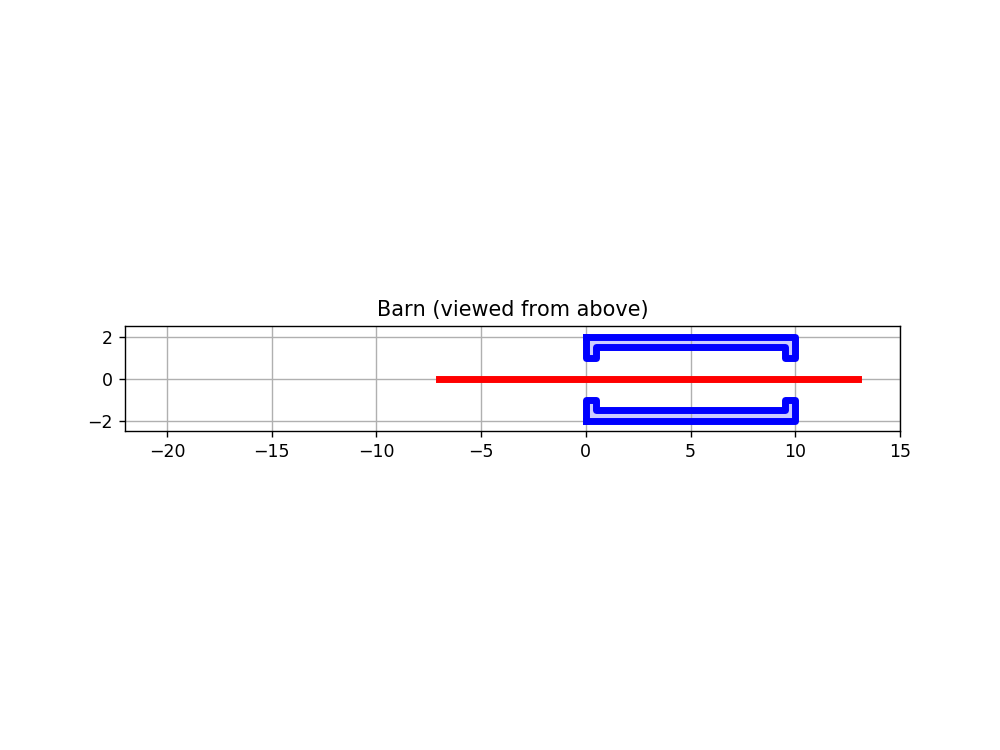

In [4]:
#Animate the pole/barn system -- NON-RELATIVISTIC SPEEDS

fig, ax = plt.subplots( figsize=(8,6) )

#transpose barn arrays
xx = BarnTOP.transpose()[0]
yy = BarnTOP.transpose()[1]

qq = BarnBOT.transpose()[0]
ww = BarnBOT.transpose()[1]

#set empty array for pole
poleNR, = plt.plot([], [], 'r-', lw=4)

# initialization function: plot the background of each frame
def init():
    poleNR.set_data( [], [] )
    return poleNR,

# animation function.  This is called sequentially
def animate(i):
    back = [(-21+i),(-1+i)]
    front = [0,0]
    poleNR.set_data([back], [front])
    return poleNR,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=50, interval=20, blit=True)

#set fill for barn
ax.fill( xx, yy, 'b', qq, ww, 'b', alpha=0.2)

#Build graph
ax.set_xlim(-22,15)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect(1.0)
ax.plot( xx, yy, 'b-', qq, ww, 'b-', label='lines', lw=4)
plt.title('Barn (viewed from above)')
plt.grid(True)
plt.show()